# Tutorial Implementasi Logistic Regression

## Daftar Isi:
1. Pengenalan Logistic Regression
2. Persiapan Data dan Library
3. Implementasi dari Awal (Scratch)
4. Implementasi dengan Scikit-learn
5. Evaluasi Model Klasifikasi
6. Studi Kasus: Prediksi Diabetes
7. Latihan Mandiri

## 1. Pengenalan Logistic Regression

Logistic Regression adalah algoritma Machine Learning yang digunakan untuk klasifikasi biner. Meskipun namanya mengandung kata "regression", algoritma ini sebenarnya digunakan untuk masalah klasifikasi.

### Konsep Dasar:
- Menggunakan fungsi sigmoid untuk mengubah output menjadi probabilitas (0-1)
- Cocok untuk klasifikasi biner (dua kelas)
- Dapat diperluas untuk klasifikasi multi-kelas

### Fungsi Sigmoid:
\[ \sigma(z) = \frac{1}{1 + e^{-z}} \]

### Prediksi:
\[ P(y=1|x) = \sigma(w^Tx + b) \]

dimana:
- σ = fungsi sigmoid
- w = bobot (weights)
- x = fitur input
- b = bias

In [3]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification

# Set random seed untuk reproducibility
np.random.seed(42)

# Untuk menampilkan plot di notebook
%matplotlib inline

## 2. Implementasi dari Awal (Scratch)

Kita akan mengimplementasikan Logistic Regression dari awal untuk memahami cara kerjanya secara mendalam. Implementasi ini akan mencakup:
1. Fungsi sigmoid
2. Forward propagation
3. Perhitungan cost
4. Gradient descent
5. Prediksi

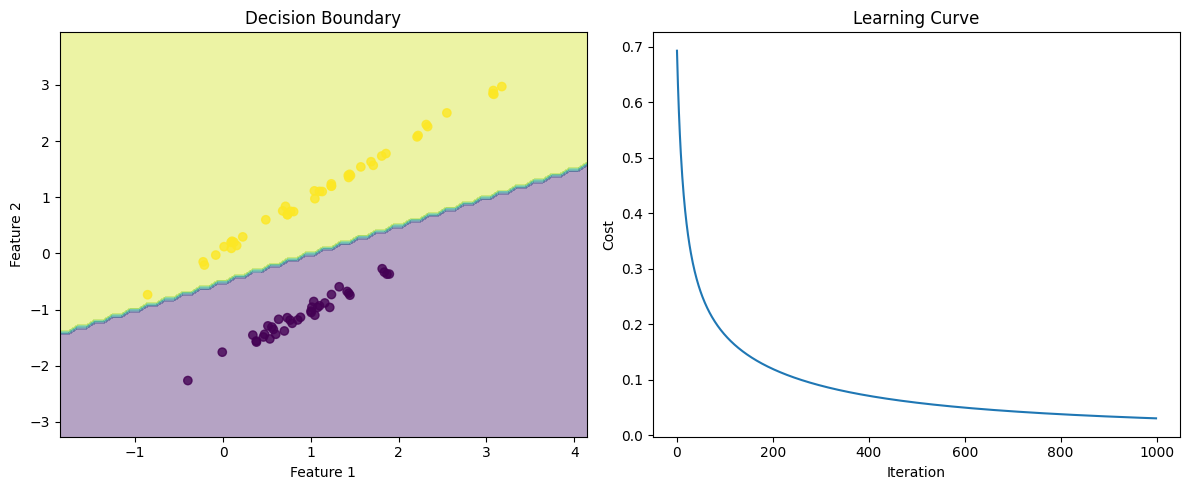

Accuracy pada data testing: 1.0000


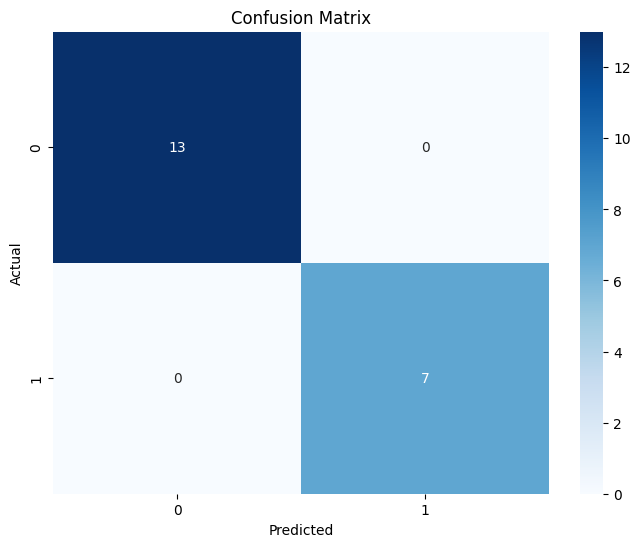


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [4]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []
        
    def sigmoid(self, z):
        """Fungsi sigmoid untuk mengubah nilai menjadi probabilitas"""
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        """Melatih model menggunakan gradient descent"""
        # Inisialisasi parameter
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent
        for _ in range(self.n_iterations):
            # Forward propagation
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            
            # Compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Compute and store cost
            cost = self._compute_cost(y_predicted, y)
            self.cost_history.append(cost)
    
    def predict(self, X):
        """Membuat prediksi untuk data baru"""
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]
    
    def _compute_cost(self, y_predicted, y):
        """Menghitung binary cross-entropy loss"""
        return -np.mean(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))

# Membuat dataset sintetis
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model_scratch = LogisticRegressionScratch(learning_rate=0.1, n_iterations=1000)
model_scratch.fit(X_train, y_train)

# Evaluasi model
y_pred = model_scratch.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Visualisasi hasil
plt.figure(figsize=(12, 5))

# Plot decision boundary
plt.subplot(1, 2, 1)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = model_scratch.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array(Z).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot learning curve
plt.subplot(1, 2, 2)
plt.plot(model_scratch.cost_history)
plt.title('Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('Cost')

plt.tight_layout()
plt.show()

print(f"Accuracy pada data testing: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

## 3. Implementasi dengan Scikit-learn

Sekarang kita akan menggunakan implementasi Logistic Regression dari scikit-learn. Ini adalah implementasi yang lebih efisien dan memiliki banyak fitur tambahan seperti:
- Regularisasi (L1 dan L2)
- Multi-class classification
- Berbagai solver optimization
- Handling untuk data tidak seimbang

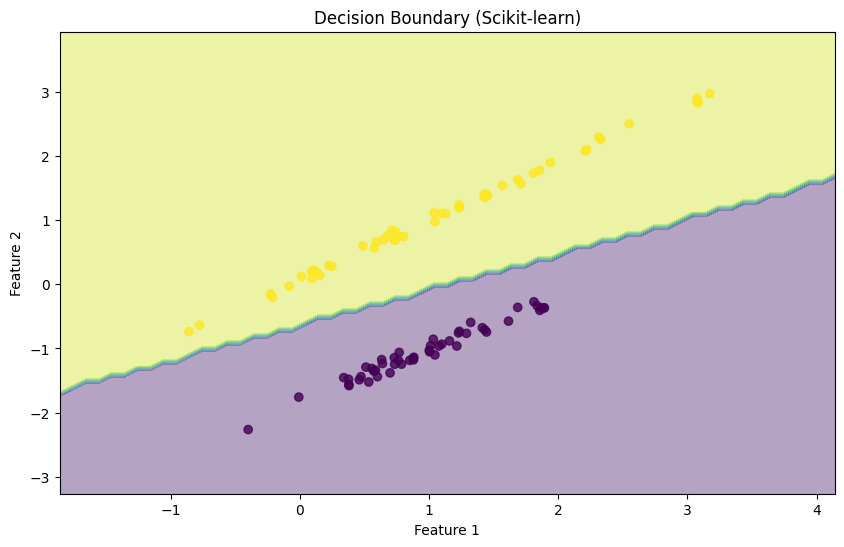

Accuracy dengan scikit-learn: 1.0000


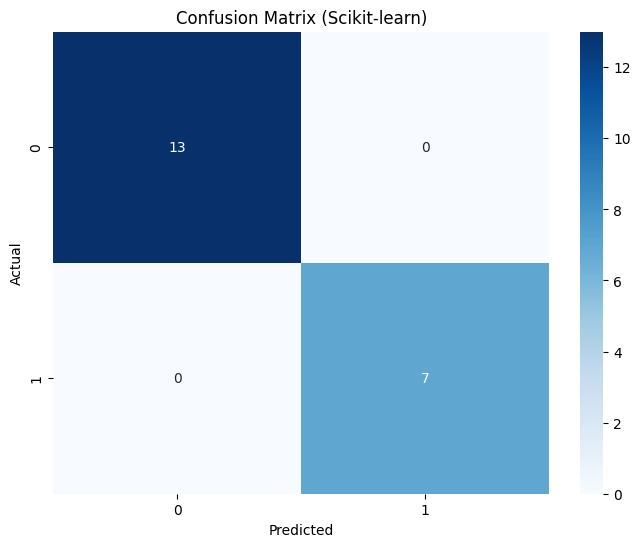

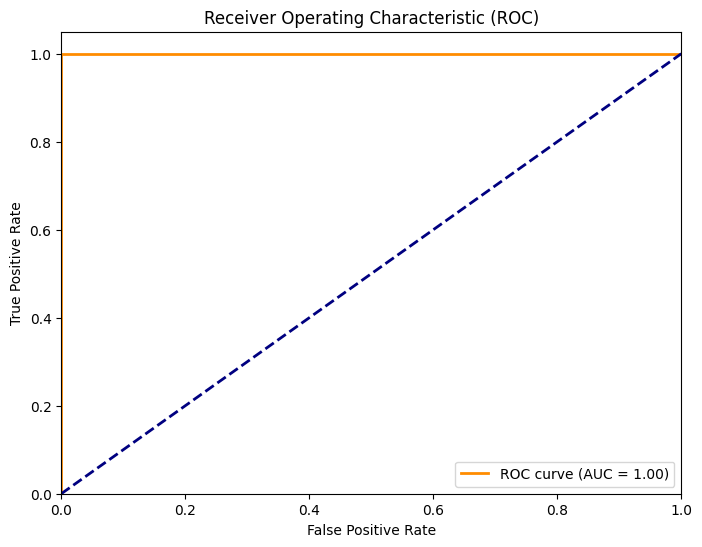


Classification Report (Scikit-learn):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [5]:
# Implementasi dengan scikit-learn
model_sklearn = LogisticRegression(random_state=42)
model_sklearn.fit(X_train, y_train)

# Prediksi
y_pred_sklearn = model_sklearn.predict(X_test)
y_prob_sklearn = model_sklearn.predict_proba(X_test)

# Evaluasi
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

# Visualisasi decision boundary
plt.figure(figsize=(10, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = model_sklearn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.title('Decision Boundary (Scikit-learn)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

print(f"Accuracy dengan scikit-learn: {accuracy_sklearn:.4f}")

# Confusion Matrix
cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sklearn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Scikit-learn)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_prob_sklearn[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Classification Report
print("\nClassification Report (Scikit-learn):")
print(classification_report(y_test, y_pred_sklearn))

## 4. Studi Kasus: Prediksi Diabetes

Kita akan menggunakan dataset Pima Indians Diabetes untuk memprediksi apakah seseorang menderita diabetes berdasarkan berbagai faktor medis.

### Fitur yang digunakan:
1. Pregnancies: Jumlah kehamilan
2. Glucose: Kadar glukosa
3. BloodPressure: Tekanan darah
4. SkinThickness: Ketebalan kulit
5. Insulin: Kadar insulin
6. BMI: Body Mass Index
7. DiabetesPedigreeFunction: Riwayat diabetes dalam keluarga
8. Age: Usia

### Target:
- 0: Tidak diabetes
- 1: Diabetes

Model Evaluation:
Accuracy: 0.6300

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.78      0.71       115
           1       0.59      0.42      0.49        85

    accuracy                           0.63       200
   macro avg       0.62      0.60      0.60       200
weighted avg       0.62      0.63      0.62       200



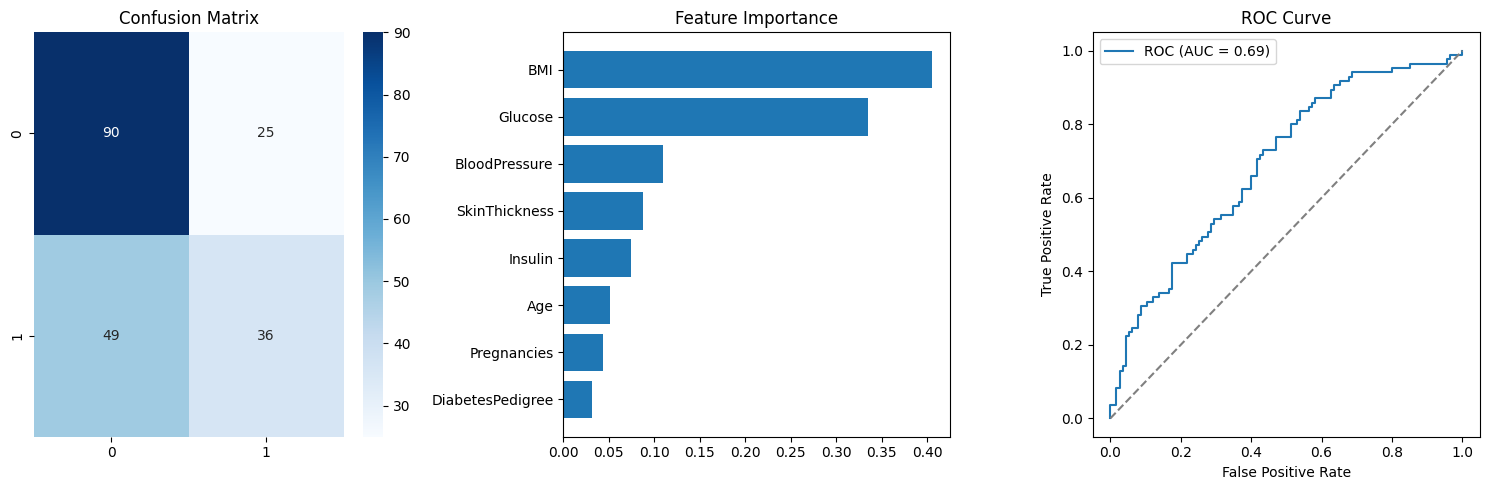


Contoh Prediksi:
Karakteristik pasien:
Pregnancies: 2
Glucose: 130
BloodPressure: 75
SkinThickness: 25
Insulin: 90
BMI: 34
DiabetesPedigree: 0.5
Age: 40

Hasil prediksi: Tidak Diabetes
Probabilitas diabetes: 47.69%


/home/dihak/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [6]:
# Load dataset diabetes
from sklearn.datasets import load_diabetes
import pandas as pd
import seaborn as sns

# Buat dataset diabetes sederhana
np.random.seed(42)
n_samples = 1000

# Generate synthetic data
data = {
    'Pregnancies': np.random.randint(0, 15, n_samples),
    'Glucose': np.random.normal(120, 30, n_samples),
    'BloodPressure': np.random.normal(70, 10, n_samples),
    'SkinThickness': np.random.normal(20, 5, n_samples),
    'Insulin': np.random.normal(80, 20, n_samples),
    'BMI': np.random.normal(32, 7, n_samples),
    'DiabetesPedigree': np.random.normal(0.5, 0.3, n_samples),
    'Age': np.random.normal(35, 10, n_samples)
}

# Create DataFrame
df = pd.DataFrame(data)

# Generate target variable based on features
# Higher chance of diabetes if glucose is high and BMI is high
probability = 1 / (1 + np.exp(-(df['Glucose']/100 + df['BMI']/20 - 3)))
df['Diabetes'] = (np.random.random(n_samples) < probability).astype(int)

# Preprocessing
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# Evaluate model
print("Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualisasi
plt.figure(figsize=(15, 5))

# Confusion Matrix
plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')

# Feature Importance
plt.subplot(1, 3, 2)
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(model.coef_[0])
})
importance = importance.sort_values('Importance', ascending=True)
plt.barh(importance['Feature'], importance['Importance'])
plt.title('Feature Importance')

# ROC Curve
plt.subplot(1, 3, 3)
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
plt.plot(fpr, tpr, label=f'ROC (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()

# Fungsi untuk prediksi
def predict_diabetes(features):
    """
    Memprediksi risiko diabetes berdasarkan fitur-fitur yang diberikan
    """
    # Scale features
    features_scaled = scaler.transform([features])
    
    # Get prediction and probability
    prediction = model.predict(features_scaled)[0]
    probability = model.predict_proba(features_scaled)[0][1]
    
    return prediction, probability

# Contoh penggunaan
sample_patient = [2, 130, 75, 25, 90, 34, 0.5, 40]
prediction, probability = predict_diabetes(sample_patient)

print("\nContoh Prediksi:")
print("Karakteristik pasien:")
for feature, value in zip(X.columns, sample_patient):
    print(f"{feature}: {value}")
print(f"\nHasil prediksi: {'Diabetes' if prediction == 1 else 'Tidak Diabetes'}")
print(f"Probabilitas diabetes: {probability:.2%}")

## 5. Latihan Mandiri

### Latihan 1: Prediksi Kelulusan Mahasiswa
Buat model untuk memprediksi kelulusan mahasiswa berdasarkan:
- Nilai UTS
- Nilai UAS
- Kehadiran
- Waktu belajar per minggu
- Nilai tugas

### Latihan 2: Deteksi Email Spam
Implementasikan klasifikasi email spam dengan fitur:
- Jumlah kata
- Jumlah karakter khusus
- Proporsi huruf kapital
- Presence of specific keywords
- URL count

### Latihan 3: Prediksi Churn Customer
Buat model untuk memprediksi churn pelanggan dengan fitur:
- Lama berlangganan
- Total transaksi
- Frekuensi komplain
- Average spending
- Last purchase recency

### Tips Mengerjakan:
1. Mulai dengan eksplorasi data
2. Lakukan preprocessing yang sesuai
3. Implementasikan cross-validation
4. Evaluasi dengan berbagai metrik
5. Visualisasikan hasil

### Bonus Challenge:
1. Implementasikan feature selection
2. Tambahkan regularisasi
3. Handle imbalanced classes
4. Implementasikan grid search untuk hyperparameter tuning

## 6. Kesimpulan dan Best Practices

### Kesimpulan:
1. Logistic Regression adalah algoritma powerful untuk klasifikasi biner
2. Mudah diimplementasikan dan diinterpretasi
3. Bekerja baik untuk data linear-separable
4. Dapat diperluas untuk multi-class classification

### Best Practices:
1. **Preprocessing Data**:
   - Standardisasi fitur numerik
   - Encoding fitur kategorikal
   - Handle missing values
   - Handle outliers

2. **Feature Engineering**:
   - Pilih fitur yang relevan
   - Cek multicollinearity
   - Pertimbangkan feature interactions
   - Normalisasi skala fitur

3. **Model Selection**:
   - Gunakan cross-validation
   - Pilih metrik evaluasi yang sesuai
   - Pertimbangkan trade-off bias-variance
   - Atur hyperparameter dengan grid search

4. **Handling Imbalanced Data**:
   - Gunakan teknik sampling (SMOTE, under/over sampling)
   - Adjust class weights
   - Gunakan metrik evaluasi yang sesuai (F1-score, ROC-AUC)

### Kapan Menggunakan Logistic Regression:
- Klasifikasi biner
- Data linear-separable
- Perlu interpretabilitas model
- Dataset tidak terlalu besar
- Prediksi probabilitas dibutuhkan

### Keterbatasan:
- Asumsi linearitas
- Tidak cocok untuk hubungan non-linear kompleks
- Sensitif terhadap outliers
- Performa bisa lebih rendah dibanding algoritma kompleks

Remember: "Simple is better than complex, but not simpler than necessary" - Pilih Logistic Regression ketika interpretabilitas dan simplicitas lebih penting dari kompleksitas! 🎯